In [11]:
%cd /Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/Funnel

/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/Funnel


**You are looking at data from an e-commerce website. The site is very simple and has just 4 pages :**

The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

From the home page, the user can perform a search and land on the search page.

From the search page, if the user clicks on a product, she will get to the payment page,where she is asked to provide payment information in order to buy that product.

If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the voluue of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
Specifically, she is interested in :
**A full picture of funnel conversion rate for both desktop and mobile
Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve**

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
user=pd.read_csv('user_table.csv')
home=pd.read_csv('home_page_table.csv')
search=pd.read_csv('search_page_table.csv')
payment=pd.read_csv('payment_page_table.csv')
confirm=pd.read_csv('payment_confirmation_table.csv')

In [36]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [37]:
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [38]:
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [39]:
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [40]:
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


# Step 1: Merge Data and Data Processing

In [43]:
data=pd.merge(left=user, right=home, how='left', on='user_id')
data=pd.merge(left=data, right=search, how='left', on='user_id', suffixes=('_home', '_search'))
data=pd.merge(left=data, right=payment, how='left', on='user_id')
data=pd.merge(left=data, right=confirm, how='left', on='user_id', suffixes=('_payment', '_confirmation'))

In [44]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null object
device               90400 non-null object
sex                  90400 non-null object
page_home            90400 non-null object
page_search          45200 non-null object
page_payment         6030 non-null object
page_confirmation    452 non-null object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [46]:
data.describe()

,user_id
count,90400.000000
mean,498709.683473
std,289040.674085
min,17.000000
25%,247978.750000
50%,498267.000000
75%,749789.250000
max,999979.000000


# Step 2: Exploratory Analysis

In [54]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [87]:
conversion_rate=pd.DataFrame((len(data)-data.isnull().sum())/len(data)).iloc[4:, :]
conversion_rate.rename(columns={0: 'conversion_rate'}, inplace=True)
conversion_rate.reset_index(inplace=True)

In [88]:
conversion_rate

,index,conversion_rate
0,page_home,1.000000
1,page_search,0.500000
2,page_payment,0.066704
3,page_confirmation,0.005000


**Let's take a look at the conversion_rate chart**

**Overall Situation**

Text(0.5, 1.0, 'Fraction of Each Step')

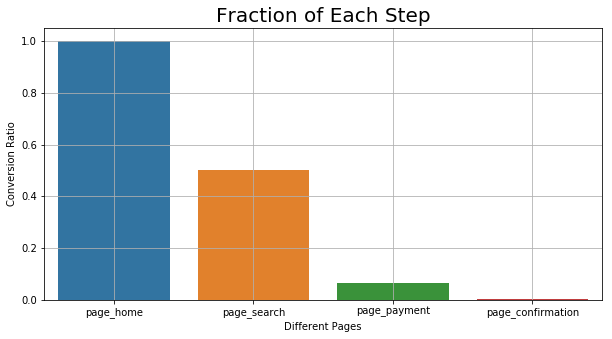

In [116]:
fig, ax=plt.subplots(figsize=(10, 5))
sns.barplot(x='index', y='conversion_rate', data=conversion_rate)
ax.grid(True)
ax.set_xlabel('Different Pages')
ax.set_ylabel('Conversion Ratio')
ax.set_title('Fraction of Each Step', fontsize= 20)

**Overall Conversion Rate**

In [181]:
def conversion_rate(df):
    rates=[]
    for i in (5, 6, 7):
        rates.append(((~df.iloc[:, i].isnull()).sum())/((~df.iloc[:, i-1].isnull()).sum()))
    return rates

In [228]:
rate=conversion_rate(data)
over_all_rate=pd.DataFrame({'index':['search', 'payment', 'confirmation'], 'conversion_rate': rate})
over_all_rate

,index,conversion_rate
0,search,0.500000
1,payment,0.133407
2,confirmation,0.074959


Text(0.5, 1.0, 'Overall Conversion Rate')

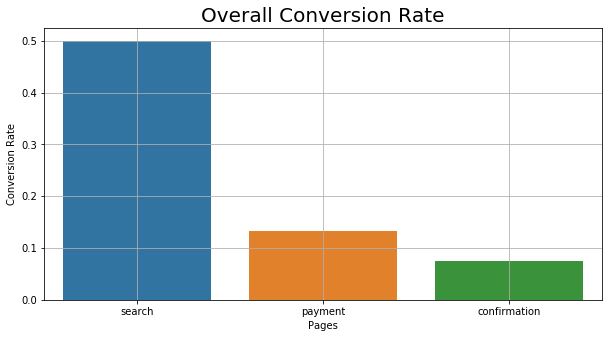

In [229]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x='index', y='conversion_rate', data=over_all_rate)
ax.grid(True)
ax.set_ylabel('Conversion Rate')
ax.set_xlabel('Pages')
ax.set_title('Overall Conversion Rate', fontsize=20)


**By Device**

In [230]:
data_D=data[data.device=='Desktop']
data_M=data[data.device=='Mobile']
M_rate=conversion_rate(data_M)
D_rate=conversion_rate(data_D)

In [231]:
#D_rate + M_rate

In [232]:
dic = {'page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'conversion rate': D_rate + M_rate}
device_conv = pd.DataFrame(dic)

In [233]:
device_conv

,page,device,conversion rate
0,home,Desktop,0.500000
1,search,Desktop,0.100000
2,payment,Desktop,0.049834
3,home,Mobile,0.500000
4,search,Mobile,0.200000
5,payment,Mobile,0.100000


Text(0.5, 1.0, 'Device Conversion Rate')

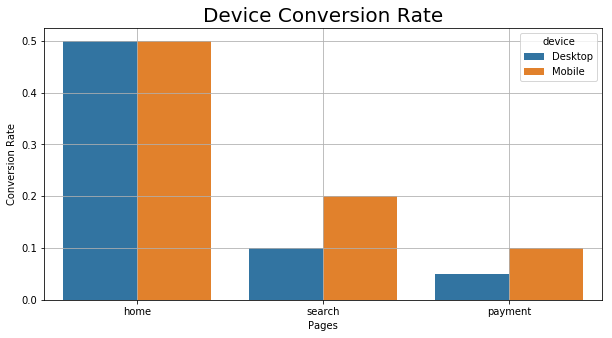

In [234]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x='page', y='conversion rate', data=device_conv, hue='device')
ax.grid(True)
ax.set_ylabel('Conversion Rate')
ax.set_xlabel('Pages')
ax.set_title('Device Conversion Rate', fontsize=20)


**By Sex**

In [235]:
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [236]:
data_F=data[data.sex=='Female']
data_M=data[data.sex=='Male']
F_rate=conversion_rate(data_F)
M_rate=conversion_rate(data_M)

In [237]:
dic = {'page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'conversion rate': M_rate + F_rate}
device_conv2 = pd.DataFrame(dic)

In [238]:
device_conv2

,page,sex,conversion rate
0,home,Male,0.496944
1,search,Male,0.130083
2,payment,Male,0.072014
3,home,Female,0.503073
4,search,Female,0.136708
5,payment,Female,0.077742


Text(0.5, 1.0, 'Sex Conversion Rate')

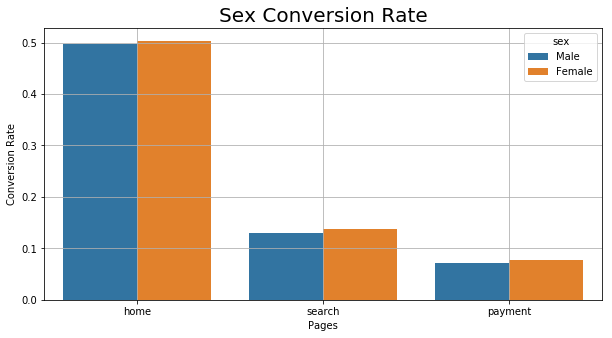

In [239]:
fig, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x='page', y='conversion rate', data=device_conv2, hue='sex')
ax.grid(True)
ax.set_ylabel('Conversion Rate')
ax.set_xlabel('Pages')
ax.set_title('Sex Conversion Rate', fontsize=20)


# Math Analysis